In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
images_dir = os.listdir("./Flickr8k_Dataset/Flicker8k_Dataset/")

images_path = './Flickr8k_Dataset/Flicker8k_Dataset/'
captions_path = './Flickr8k_text/Flickr8k.token.txt'
train_path = './Flickr8k_text/Flickr_8k.trainImages.txt'
val_path = './Flickr8k_text/Flickr_8k.devImages.txt'
test_path = './Flickr8k_text/Flickr_8k.testImages.txt'

captions = open(captions_path, 'r').read().split("\n")
x_train = open(train_path, 'r').read().split("\n")
x_val = open(val_path, 'r').read().split("\n")
x_test = x_val = open(test_path, 'r').read().split("\n")

In [6]:
tokens = {}

for ix in range(len(captions)):
    temp = captions[ix].split("#")
    if temp[0] in tokens:
        tokens[temp[0]].append(temp[1][2:])
    else:
        tokens[temp[0]] = [temp[1][2:]]
        

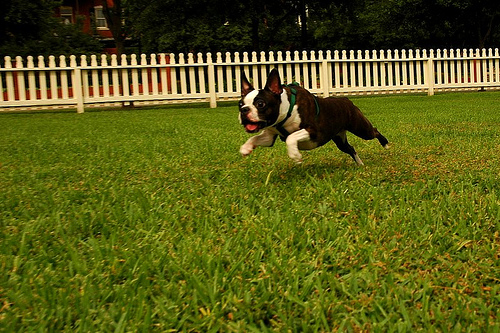

A black and white dog is running in a grassy garden surrounded by a white fence .
A black and white dog is running through the grass .
A Boston terrier is running in the grass .
A Boston Terrier is running on lush green grass in front of a white fence .
A dog runs on the green grass near a wooden fence .


In [7]:
temp = captions[32].split("#")
from IPython.display import Image, display
z = Image(filename=images_path+temp[0])
display(z)

for ix in range(len(tokens[temp[0]])):
    print tokens[temp[0]][ix]

In [8]:
train_dataset = open('./Flickr8k_text/flickr_8k_train_dataset.txt','wb')
train_dataset.write("image_id\tcaptions\n")

val_dataset = open('Flickr8k_text/flickr_8k_val_dataset.txt','wb')
val_dataset.write("image_id\tcaptions\n")

test_dataset = open('./Flickr8k_text/flickr_8k_test_dataset.txt','wb')
test_dataset.write("image_id\tcaptions\n")

In [14]:
for img in x_train:
    if img == '':
        pass
    else:
        for capt in tokens[img]:
            caption = "<start> "+capt+" <end>"
            train_dataset.write(img+"\t"+caption+"\n")
train_dataset.close()

In [15]:
for img in x_test:
    if img == '':
        pass
    else:
        for capt in tokens[img]:
            caption = "<start> "+capt+" <end>"
            test_dataset.write(img+"\t"+caption+"\n")
test_dataset.close()

In [16]:
for img in x_val:
    if img == '':
        pass
    else:
        for capt in tokens[img]:
            caption = "<start> "+capt+" <end>"
            val_dataset.write(img+"\t"+caption+"\n")
val_dataset.close()